In [23]:
import cv2
from utils import *

In [24]:
img = cv2.imread('./images/shade.png', cv2.IMREAD_COLOR_RGB)
print(img.shape)
print(img.dtype)

(554, 665, 3)
uint8


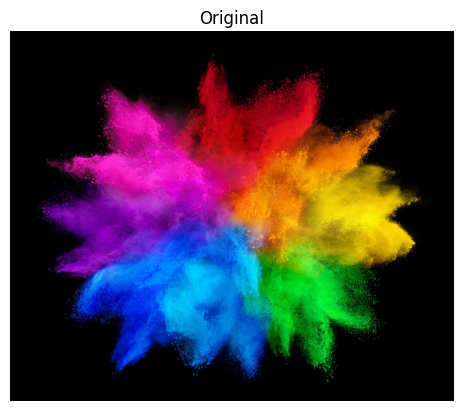

In [25]:
plt_image(img, title='Original')

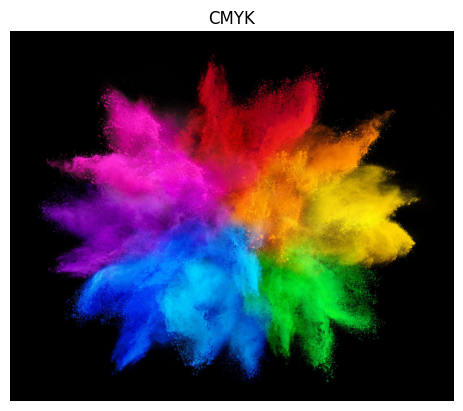

In [26]:
cmyk = rgb_to_cmyk(img)
plt_image(img, title='CMYK')

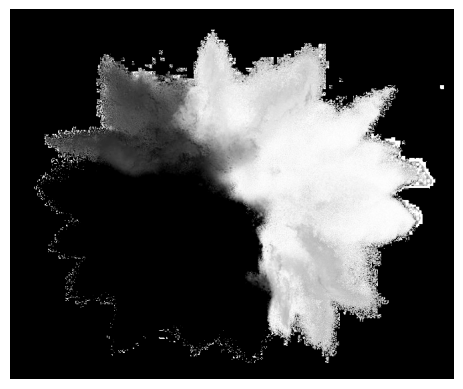

In [27]:
c = cmyk[:, :, 0]
plt_image(c, gray=True)

In [28]:
binary_mask = np.zeros_like(c, dtype='uint8')
binary_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(554, 665), dtype=uint8)

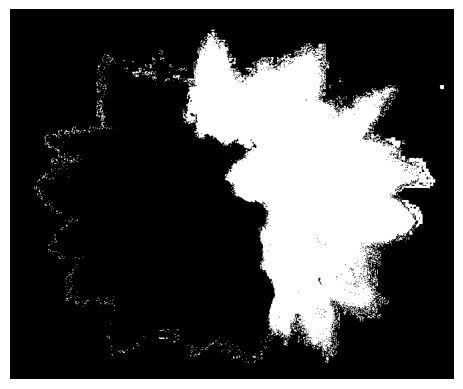

In [31]:
binary_mask[c >= 180] = 255
plt_image(binary_mask, gray=True)

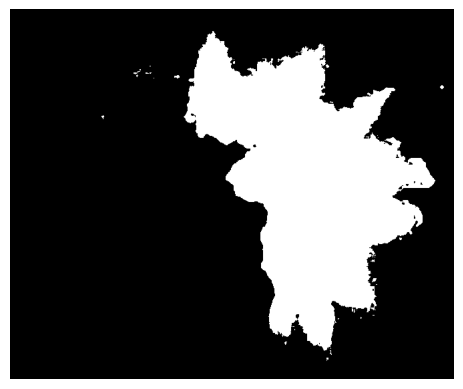

In [32]:
binary_mask_median = cv2.medianBlur(binary_mask, 5)
plt_image(binary_mask_median, gray=True)

# HSV

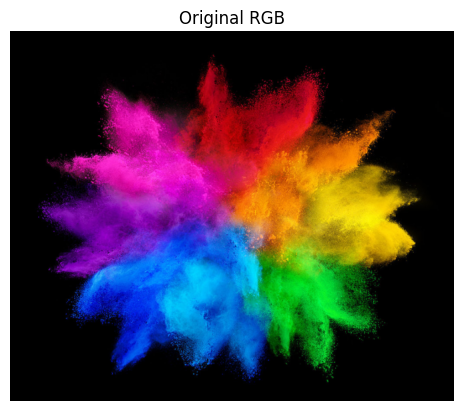

In [35]:
plt_image(img, title = 'Original RGB')

In [36]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

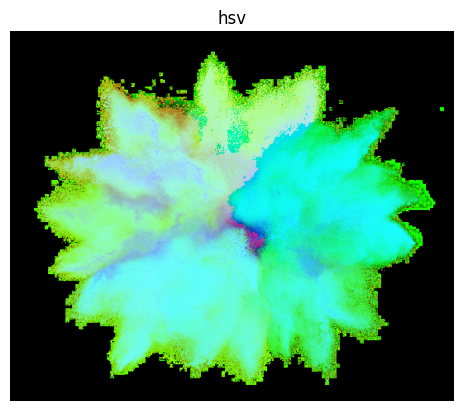

In [37]:
plt_image(hsv, title ='hsv')

In [39]:
h, s, v = cv2.split(hsv)

In [43]:
h_double = h.astype(np.uint16) * 2

In [45]:
mask_h = ((h_double >= 0) & (h_double <= 150)) | ((h_double >= 330) & (h_double <= 360))
mask_s = (s >= 120) & (s <= 255)
mask_v = (v >= 70) & (v <= 255)

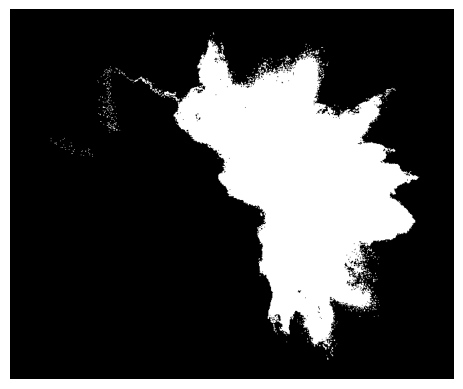

In [46]:
mask_bool = mask_h & mask_s & mask_v
mask_hsv = (mask_bool.astype(np.uint8)) * 255
plt_image(mask_hsv, gray=True)

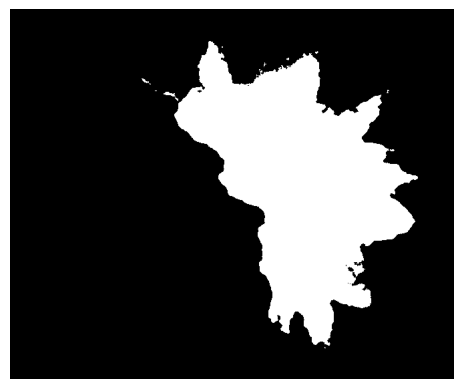

In [47]:
mask_hsv_median_blur = cv2.medianBlur(mask_hsv, 5)
plt_image(mask_hsv_median_blur, gray=True)

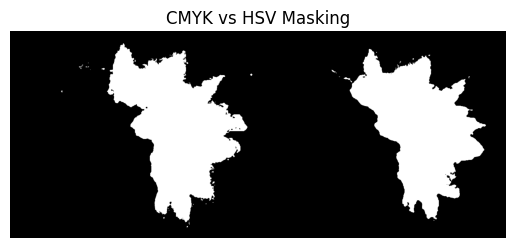

In [48]:
result = cv2.hconcat([binary_mask_median, mask_hsv_median_blur])
plt_image(result, gray=True, title="CMYK vs HSV Masking")